In [198]:
# keras learning from titanic dataset

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from patsy import dmatrices
from pandas import Series, DataFrame
from sklearn import datasets, svm
from sklearn.cross_validation import train_test_split
from keras.regularizers import l2
from keras.optimizers import SGD
## importing keras
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input
from keras.utils import np_utils
from keras.regularizers import l2

In [199]:
#loading data
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [200]:
#we can drop Name and ticket to clean data

df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna()

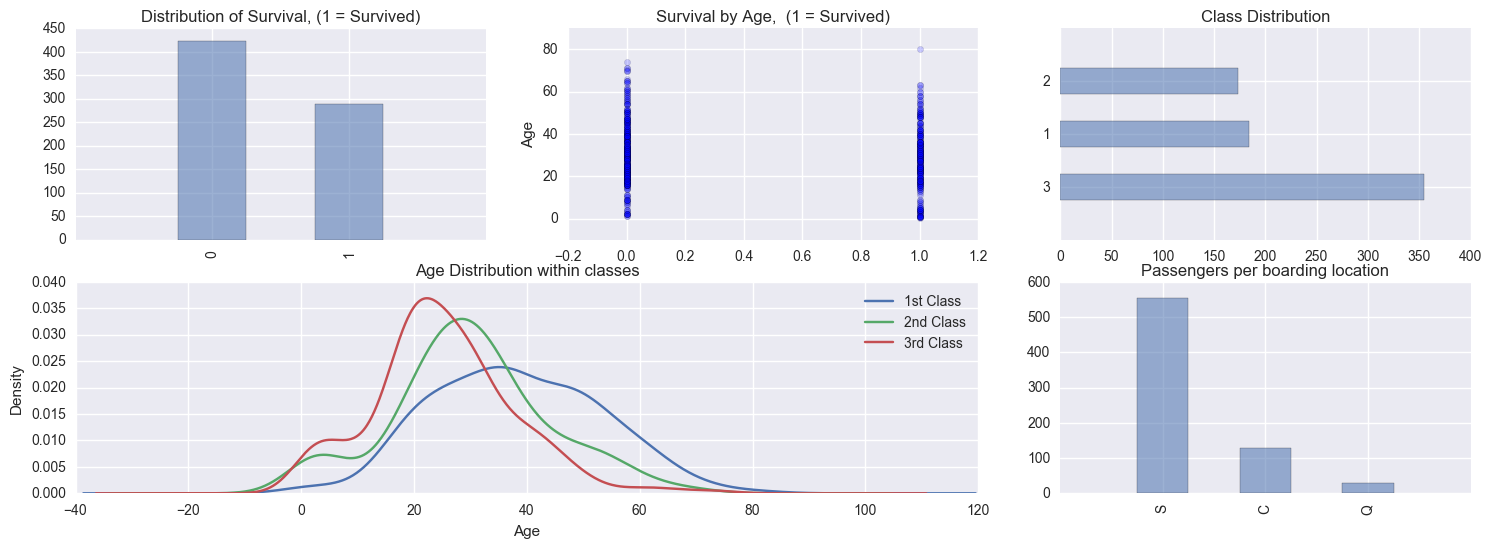

In [201]:
#looking at data graphically

# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

In [202]:
# using patsy

formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked) + SibSp * Parch' 
y,x = dmatrices(formula, data=df, return_type='dataframe')

In [203]:
#splitting the data
train_X, test_X, train_y, test_y = train_test_split(x, y, train_size=0.8, random_state=0)

In [204]:
#converting the output to one hot vector
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

In [205]:
train_X.shape

(569, 10)

In [241]:
#now creating the keras nn

model = Sequential()

model.add(Dense(32, input_shape=(10,), W_regularizer=l2(0.01)))
model.add(Activation('tanh'))

model.add(Dense(32, input_shape=(32,), W_regularizer=l2(0.01)))
model.add(Activation('tanh'))

#adding output layer
model.add(Dense(2))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

#compiling the mode
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
#model.compile(optimizer='sgd', loss = "mean_squared_error", metrics=["accuracy"])

In [242]:
history = model.fit(train_X.as_matrix(), train_y_ohe, nb_epoch=75, batch_size=16, verbose=0,
                    validation_data=(test_X.as_matrix(), test_y_ohe));

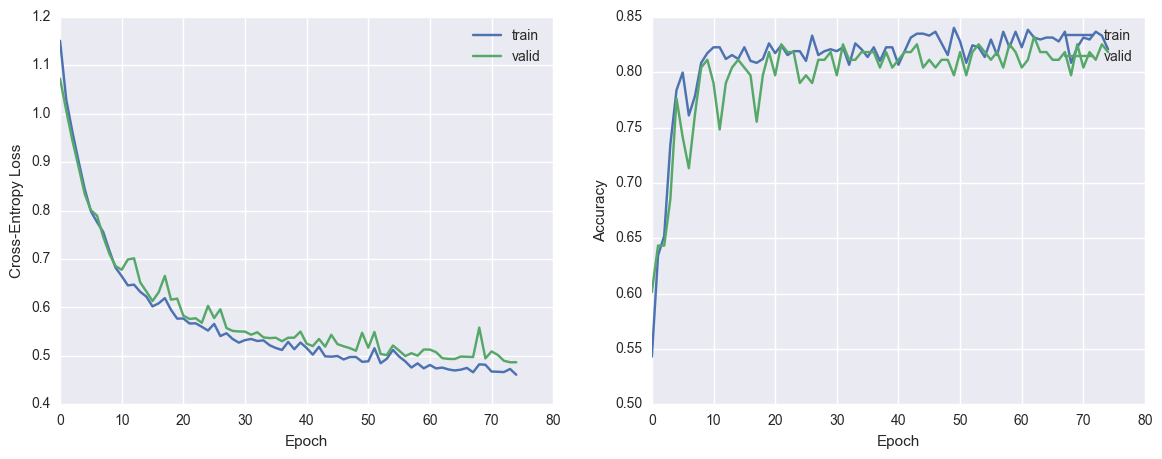

In [243]:
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
# now predcting on kaggle lets see

In [244]:
op = pd.read_csv("data/test.csv")

op = op.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
#op = op.dropna()
op = op.ffill()
op = op.bfill()
print(1)

1


In [245]:
formula = 'PassengerId ~ C(Pclass) + C(Sex) + Age + SibSp  + C(Embarked) + SibSp * Parch'

In [246]:
op.shape

(418, 9)

In [247]:
y_pre,x_pre = dmatrices(formula, data=op, return_type='dataframe')
x_pre.shape

(418, 10)

In [248]:
output = model.predict(x_pre.as_matrix())

In [249]:
op1 = []

for i in range(len(output)):
    if(output[i][0] > output[i][1]):
        op1.append(0)
    else:
        op1.append(1)

In [250]:
op['Survived'] = op1

In [251]:
#op.head() = 
op  = op.set_index(['PassengerId'])
op.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0


In [252]:
op[['Survived']].to_csv("data/predction_v6.csv")

In [ ]:
#the Script score 0.7655, which is not the best, but this gave me good experience of keras.